In [1]:
import numpy as np
import time
from collections import namedtuple
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import qiskit as q
import qiskit.tools.jupyter
from qiskit.pulse import pulse_lib as _  # only want to call pulse_lib as q.pulse.pulse_lib
from qiskit.test.mock import FakeAlmaden
from qiskit.ignis.verification.tomography.data import marginal_counts

In [3]:
import sys
sys.path.append('../')
import pulse_compiler_helper_fns

In [4]:
backend = FakeAlmaden()
defaults = backend.defaults()
system = q.pulse.PulseChannelSpec.from_backend(backend)
circ_inst_map = defaults.circuit_instruction_map
measure = circ_inst_map.get('measure', qubits=backend.configuration().meas_map[0])
backend_sim = qiskit.Aer.get_backend('pulse_simulator')

/Users/pranavgokhale/Developer/qiskit/qiskit-terra/qiskit/pulse/channels/pulse_channel_spec.py:87: DeprecationWarning: The PulseChannelSpec is deprecated. Use backend.configuration() instead. The supported methods require some migrations; check out the release notes for the complete details.
  DeprecationWarning)


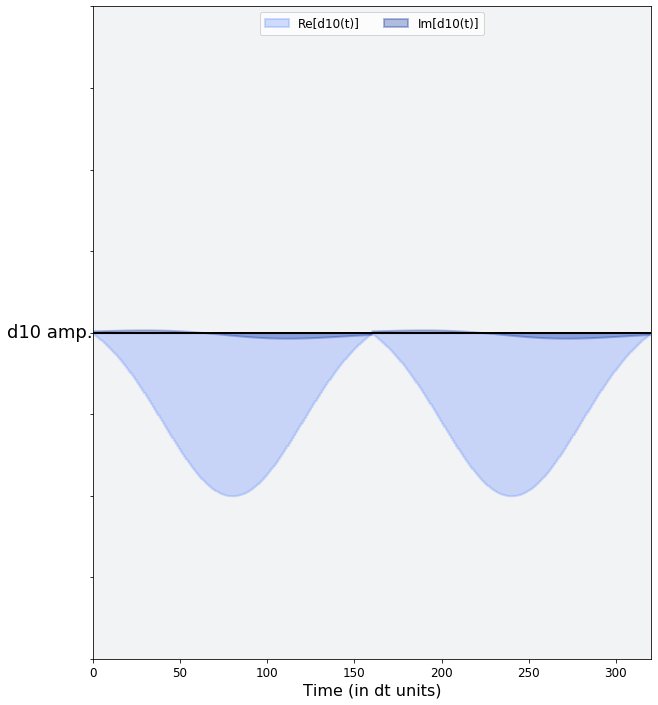

In [5]:
schedule = circ_inst_map.get('u3', qubits=[10], P0=np.pi, P1=0, P2=np.pi)
schedule.draw(channels=[system.qubits[10].drive], framechange=False, table=False, filename='standard_x.svg')

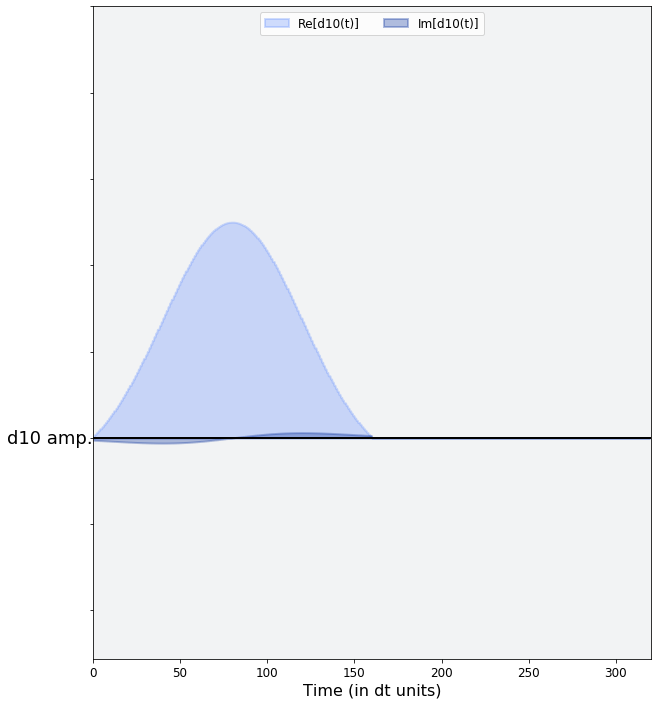

In [10]:
circuit = q.QuantumCircuit(20)
circuit.x(10)
with qiskit.PulseBackedOptimizationContext():
    decomposed_circuit = circuit.decompose()
    pulse_compiler_helper_fns.update_basis_gates_and_circ_inst_map(decomposed_circuit, backend, circ_inst_map)
    transpiled_circuit = q.transpile(circuit, backend, optimization_level=1)
    schedule = q.schedule(transpiled_circuit, backend=backend, inst_map=circ_inst_map)
    schedule |= q.pulse.SamplePulse([0] * 160)(system.qubits[10].drive) << schedule.duration
schedule.draw(channels=[system.qubits[10].drive], framechange=False, table=False, filename='direct_x.svg')